## Exercise 1

1.) In this first exercise, I simply used OpenCV's built-in function to convert the BGR image to HSV (cv.cvtColor()). The 

Images chosen for this exercise:


<Figure size 1440x720 with 0 Axes>

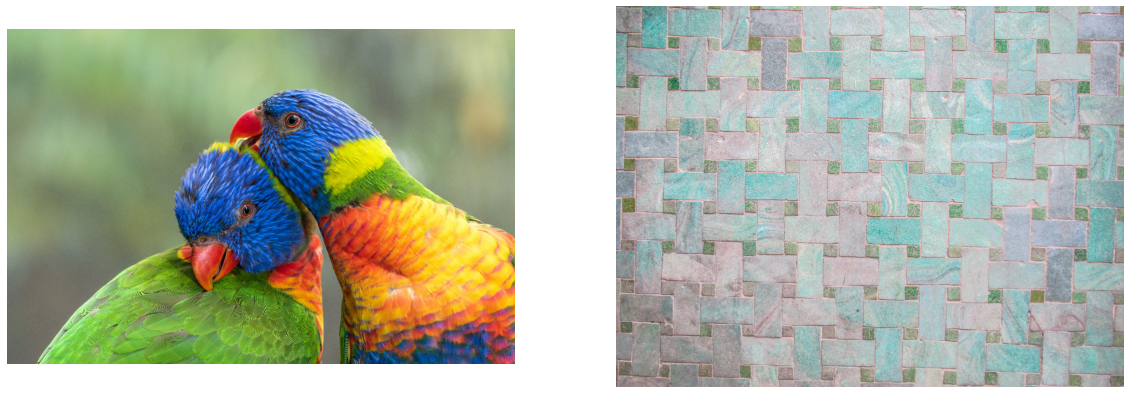

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# Custom function to display images nicely using pyplot
def show_images(*images):
    plt.figure()
    if len(images) == 1:
        plt.axis('off')
        plt.imshow(images[0], vmin=0, vmax=255)
    else:
        f, axarr = plt.subplots(1, len(images))

        for i, a in zip(images, axarr):
            a.axis('off')
            a.imshow(i, vmin=0, vmax=255)

# Loading and converting images from BGR to RGB
birds = cv.imread('./img/birds.jpg')
birds = cv.cvtColor(birds, cv.COLOR_BGR2RGB)
stone = cv.imread('./img/stone.jpg')
stone = cv.cvtColor(stone, cv.COLOR_BGR2RGB)

# Conversion of RGB to HSV image
birds_converted = cv.cvtColor(birds, cv.COLOR_RGB2HSV)
stone_converted = cv.cvtColor(stone, cv.COLOR_RGB2HSV)

# Scaling down image to make processing faster (TO BE REMOVED LATER)
birds = cv.resize(birds, (int(birds.shape[1]/4), int(birds.shape[0]/4)))
stone = cv.resize(stone, (int(stone.shape[1]/4), int(stone.shape[0]/4)))

print("Images chosen for this exercise:")
show_images(birds, stone)

plt.show()


Images are (from left to right): original, 'I' image, 'V' image


<Figure size 1440x720 with 0 Axes>

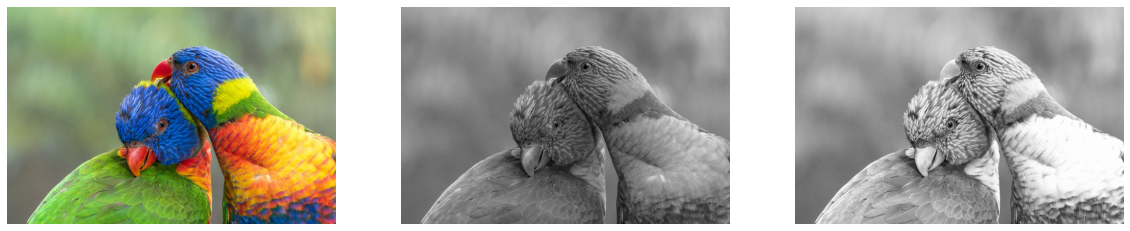

<Figure size 1440x720 with 0 Axes>

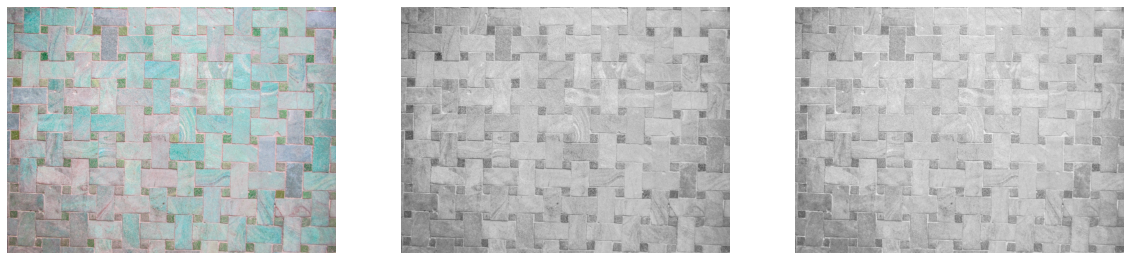

In [3]:
hsv_birds = birds.copy()
hsi_birds = birds.copy()
hsv_stone = stone.copy()
hsi_stone = stone.copy()
for i, row in enumerate(birds):
    for j, pixel in enumerate(row):
        hsi_birds[i, j] = np.mean(pixel)
        hsv_birds[i, j] = np.max(pixel)

for i, row in enumerate(stone):
    for j, pixel in enumerate(row):
        hsi_stone[i, j] = np.mean(pixel)
        hsv_stone[i, j] = np.max(pixel)

show_images(birds, hsi_birds, hsv_birds)
show_images(stone, hsi_stone, hsv_stone)

print("Images are (from left to right): original, 'I' image, 'V' image")

plt.show()

## Exercise 2

<Figure size 1440x720 with 0 Axes>

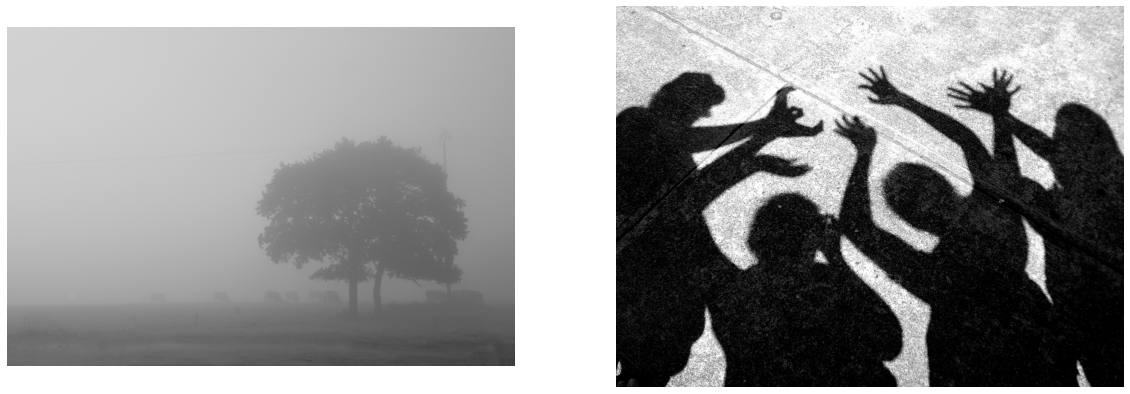

<Figure size 1440x720 with 0 Axes>

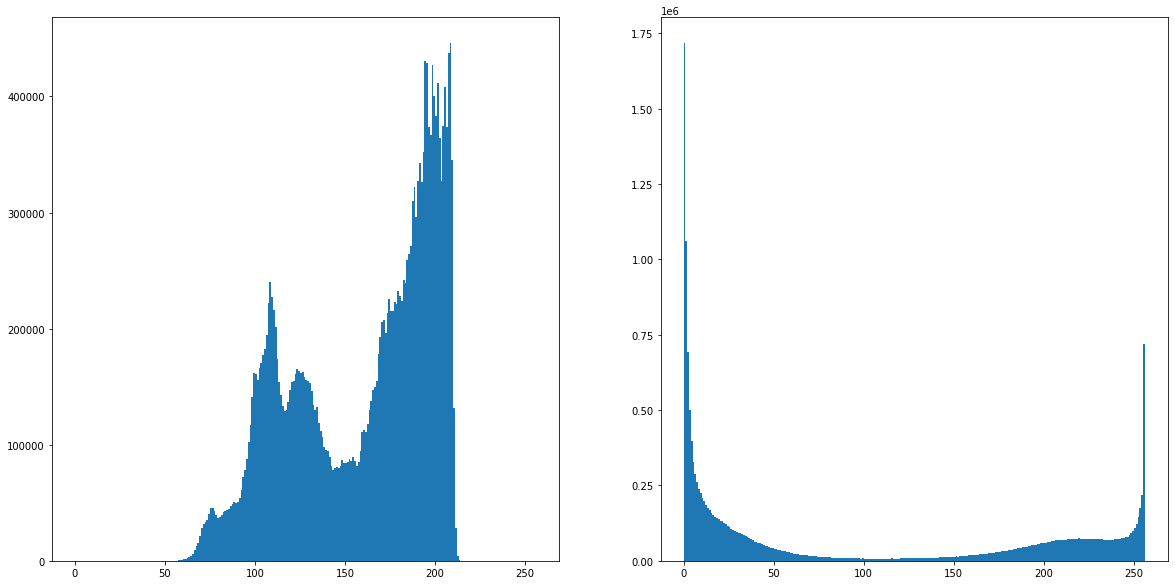

<Figure size 1440x720 with 0 Axes>

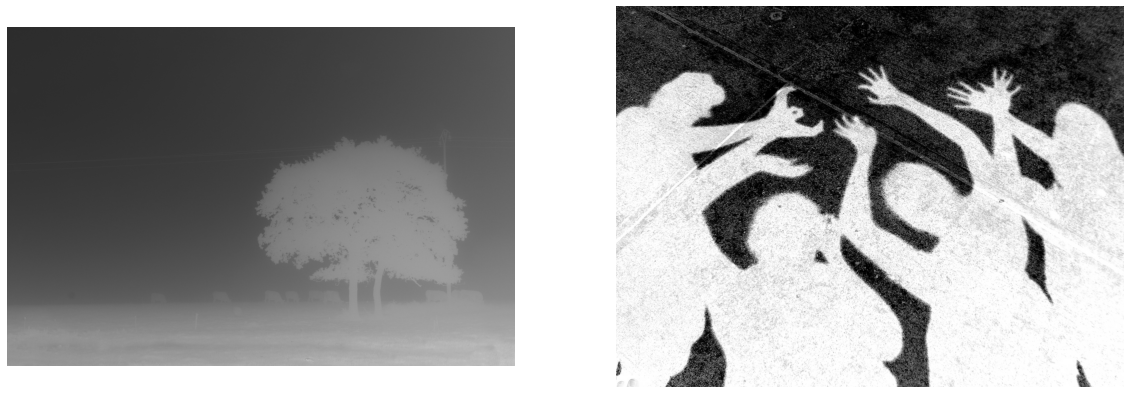

<Figure size 1440x720 with 0 Axes>

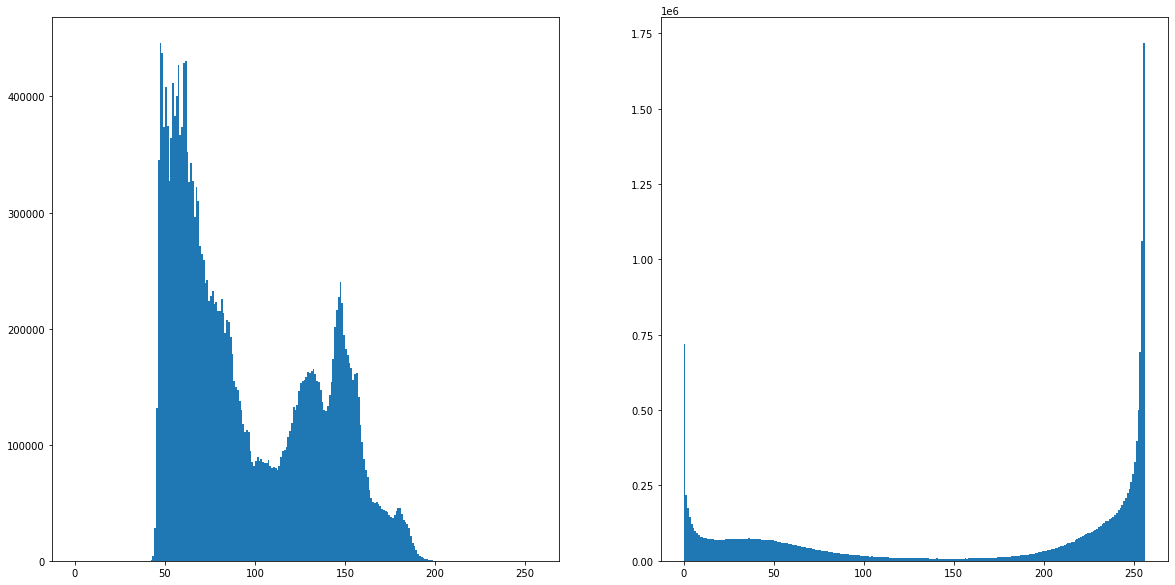

In [4]:
# Loading and converting images from BGR to RGB
fog = cv.imread('./img/fog.jpg')
fog = cv.cvtColor(fog, cv.COLOR_BGR2RGB)
shadows = cv.imread('./img/shadows.jpg')
shadows = cv.cvtColor(shadows, cv.COLOR_BGR2RGB)

show_images(fog, shadows)

# Plotting histograms for images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(fog.ravel(), 256, [0, 256])
a2.hist(shadows.ravel(), 256, [0, 256])

# Use negative point-wise transform
neg_fog = fog.copy()
neg_shadows = shadows.copy()
L = 255
for i, row in enumerate(fog):
    for j, pixel in enumerate(row):
        neg_fog[i, j] = 255-pixel[0]
for i, row in enumerate(shadows):
    for j, pixel in enumerate(row):
        neg_shadows[i, j] = 255-pixel[0]

show_images(neg_fog, neg_shadows)

# Plotting histograms of negative images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(neg_fog.ravel(), 256, [0, 256])
a2.hist(neg_shadows.ravel(), 256, [0, 256])

plt.show()


In [13]:
# Use power-rule point-wise transform
pow_fog = fog.copy()
pow_shadows = shadows.copy()
n = 1.1
for i, row in enumerate(fog):
    for j, pixel in enumerate(row):
        temp = min(255, pixel[0]**n)
        pow_fog[i, j] = temp
for i, row in enumerate(shadows):
    for j, pixel in enumerate(row):
        temp = min(255, pixel[0]**n)
        pow_shadows[i, j] = temp

show_images(pow_fog, pow_shadows)

# Plotting histograms of power-rule images
plt.figure()
_, (a1, a2) = plt.subplots(1, 2)
a1.hist(pow_fog.ravel(), 256, [0, 256])
a2.hist(pow_shadows.ravel(), 256, [0, 256])

plt.show()